<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집분석

### k_mean method
유클리디안 거리의제곱 방법을 사용
(squared euclidean distance)

In [0]:
# dataset
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

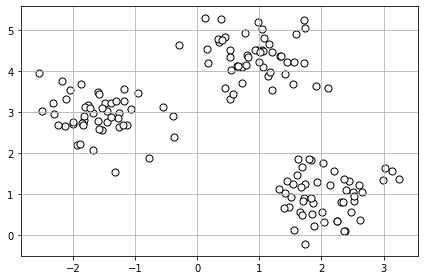

In [0]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c = 'white', marker = 'o', edgecolor = 'black', s = 50)
plt.grid()
plt.tight_layout()
plt.show()

In [0]:
from sklearn.cluster import KMeans

# n_clusters :클러스터 개수, n_init: 독립적으로 시행하는 횟수, tol: 허용되는 오차
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

No handles with labels found to put in legend.


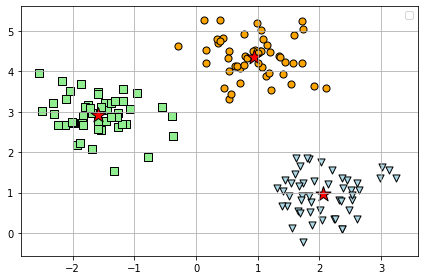

In [0]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],s = 50, c = 'lightgreen', marker = 's', edgecolor = 'black')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'black')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', edgecolor = 'black')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

k-means++ 알고리즘으로 center point를 할당할 수 있음

랜덤하게 선택하여 k개의 centeroid를 선택한 후 kmeans알고리즘을 적용


## 엘보우 방법을 사용한 클러스터 개수 최적화

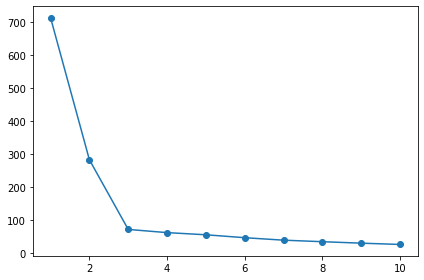

In [0]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300,random_state = 0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker = 'o')
plt.tight_layout()
plt.show()

k = 3에서 엘보우가 나타남을 확인할 수 있음

## silhouette analysis
클러스터 내 샘플들이 얼마나 조밀하게 모여있는지를 측정

In [0]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

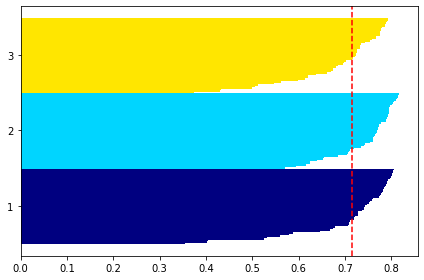

In [0]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)

  color = cm.jet(float(i)/ n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


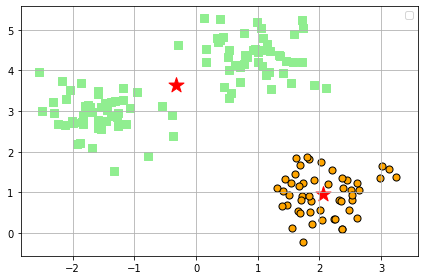

In [0]:
# 적용
km = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X [y_km == 0,1], s = 50, c = 'lightgreen', marker = 's')
plt.scatter(X[y_km == 1,0], X[y_km == 1,1], s = 50, c = 'orange', edgecolor = 'black', marker = 'o')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 250, marker = '*', c = 'red')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

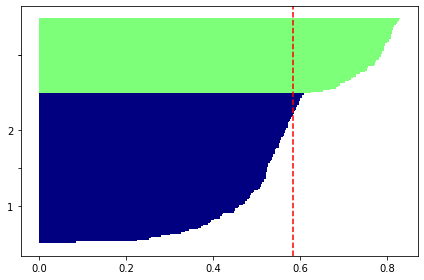

In [0]:
# 실루엣을 통한 결과평가
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0,0
y_ticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km == c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)

  color = cm.jet(i / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, edgecolor = 'none', color = color)
  yticks.append((y_ax_lower + y_ax_upper) / 2)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.tight_layout()
plt.show()